# Mall Customer Segmentation

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

## Load the Data

In [2]:
raw_data = pd.read_csv('Mall_Customers.csv')

# Shows the first five elements of the data set.
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Customer ID: Unique ID assigned to each customer.

Gender: Gender of the customer.

Age: Age of the customer.

Annual Income: Annual income of the customer (In thousands). 

Spending Score: Score assigned by the mall based on customer behavior and spending nature.

## Check for Missing Values

In [3]:
raw_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values here.

## Make all Variables Numeric

In [4]:
data = raw_data.copy()

# Gender is a categorical variable, so in order to do any data analysis, we have to make gender a numeric value.

# We can either one-hot encode or binary encode the genders, but since there are only 2 genders (male and female), in the dataset we can just map each gender.

# Male will be 1 and Female will be 0.
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Now that the data has been processed and all values are numeric we can proceed to do exploratory data analysis.

## Exploratory Data Analysis

In [5]:
# Gives descriptive statistics for each variable in the dataset
raw_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The average consumer is around 39 years old with an annual income of $60,560. His/Her spending score is around 50/100 so it looks like he/she shops a fair amount but isn't a shopaholic. 

### Male and Female

In [6]:
# Creates male and female dataframes to analyze each gender.
male = data.loc[data['Gender'] == 1]
female = data.loc[data['Gender'] == 0]

In [7]:
# Descriptive statistics for male shoppers.
male.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,88.000000,88.0,88.000000,88.000000,88.000000
mean,104.238636,1.0,39.806818,62.227273,48.511364
std,57.483830,0.0,15.514812,26.638373,27.896770
min,1.000000,1.0,18.000000,15.000000,1.000000
25%,59.500000,1.0,27.750000,45.500000,24.500000
50%,106.500000,1.0,37.000000,62.500000,50.000000
75%,151.250000,1.0,50.500000,78.000000,70.000000
max,200.000000,1.0,70.000000,137.000000,97.000000


The average male shopper is roughly 40 years old and has an annual income of $62,227. His spending score is aroud 48.51, which is slightly lower than average.

In [8]:
# Descriptive statistics for female shoppers.
female.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,112.000000,112.0,112.000000,112.000000,112.000000
mean,97.562500,0.0,38.098214,59.250000,51.526786
std,58.276412,0.0,12.644095,26.011952,24.114950
min,3.000000,0.0,18.000000,16.000000,5.000000
25%,46.750000,0.0,29.000000,39.750000,35.000000
50%,94.500000,0.0,35.000000,60.000000,50.000000
75%,148.250000,0.0,47.500000,77.250000,73.000000
max,197.000000,0.0,68.000000,126.000000,99.000000


The average female shopper is roughly 38 years old and has an annual income of $59,250. Her spending score is above the average at 51.53.

### Comparisons

The average male shopper is slightly older than the acverage female shopper and makes more money on average. However, they still have a lower spending score than their female counterparts. In the dataset there are more females than males. Males tend to shop more conservatively than females despite the higher salary.

### Graphs

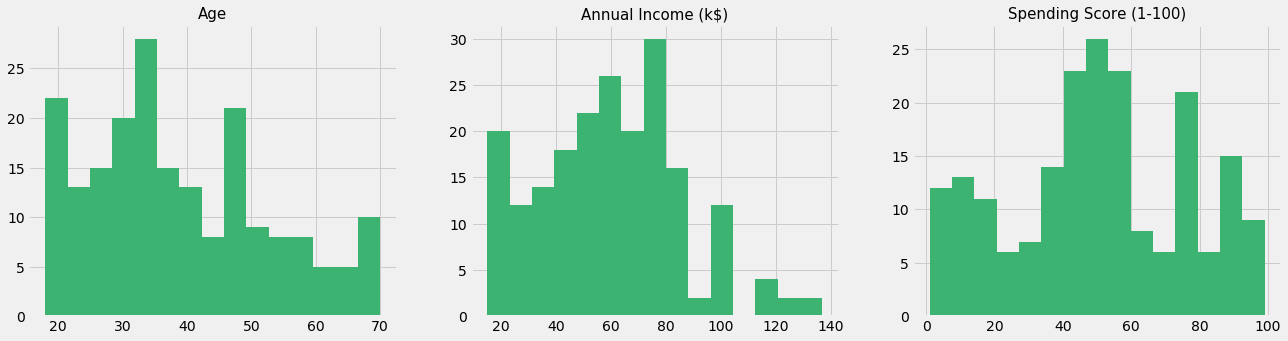

In [9]:
# We are making histograms of each of the numeric variables in the dataset: age, income, and spending score to see the distributions of the different variables.
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.hist(data[x] , bins = 15, color = 'mediumseagreen')
    plt.title('{}'.format(x), fontsize = 15)
plt.show()

#### Age:
There are multiple peaks in the graph, one at 20 years, another at around 30-35 years, and one at 48-50 years. Overall the age histogram is skewed to the right as most of the shoppers tend to be on the younger side.

#### Annual Income:
The graph is roughly normal with a peak of aroung 80,000 dollars with few shoppers having incomes greater than 100,000 dollars. Initial thoughts are that this could be a mall for lower - middle class individuals and not a luxury mall, which could be why most of the shoppers have incomes below 90,000 dollars.

#### Spending Score: 
The graph is multimodal with peaks at scores around 10, 50, and its highest peak is at 80. This shows that most of the  shoppers fall into one of these three categories: they are either cheap (low spending score), frugal (medium spending score), or extravagent (high spending score). 

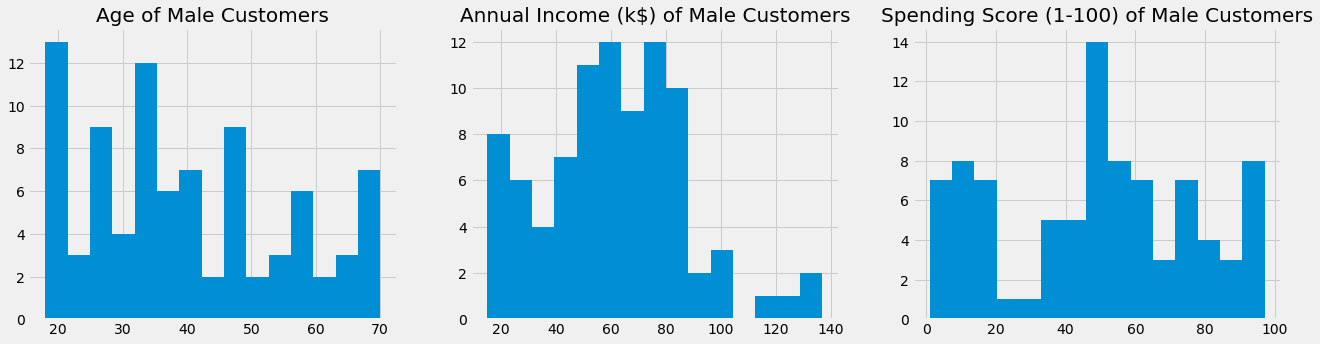

In [10]:
# Creating histograms of the variables for male customers
plt.figure(1, figsize = (20,5))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.hist(male[x], bins = 15)
    plt.title('{} of Male Customers'.format(x), fontsize = 20)

plt.show()

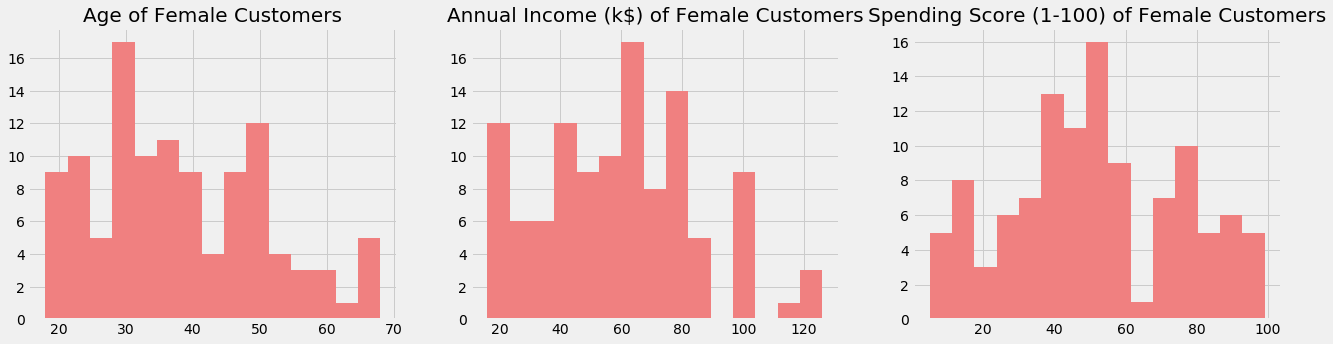

In [11]:
# Creating histograms of the variables for female customers
plt.figure(1, figsize = (20,5))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.hist(female[x], bins = 15, color = 'lightcoral')
    plt.title('{} of Female Customers'.format(x), fontsize = 20)
    
plt.show()

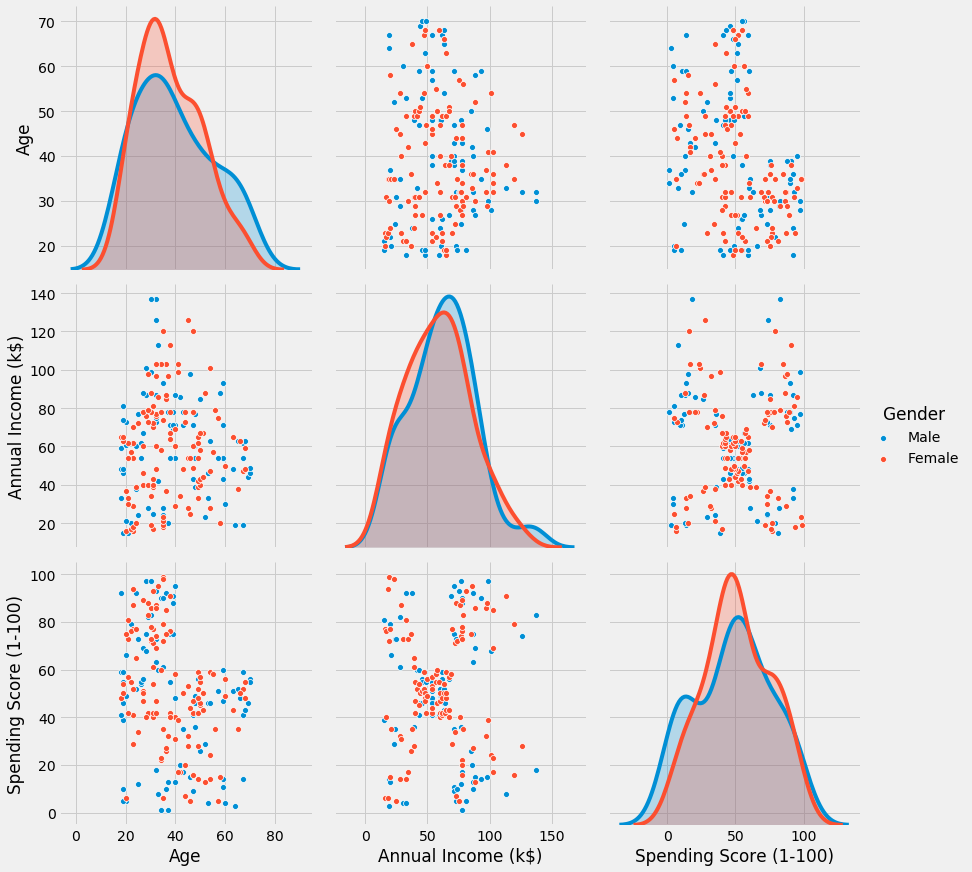

In [12]:
data_without_id = raw_data.copy()
data_without_id = data_without_id.drop(columns = ['CustomerID'])

# Creating a pairplot showing scatter plots of each variable with the other variables
# We will also color the male and female points in different colors to see their differences
sns.pairplot(data_without_id, hue = 'Gender', height = 4, aspect = 1)

#### Age: 
Since there are more female shoppers they have a higher peak in the age distribution than males. The mode of the shoppers are about the same. The female ages are roughly bell shaped, while the male ages are slightly skewed to the right.

#### Annual Income: 
The male income peak is slightly higher than the female peak and more male shoppers are making >75,000 dollars than woman. Both distributions are roughly normal.


#### Spending Score: 
The mode spending score is slightly higher for males than females, although the frequncy is larger for females. Both distributions are also roughly normal.

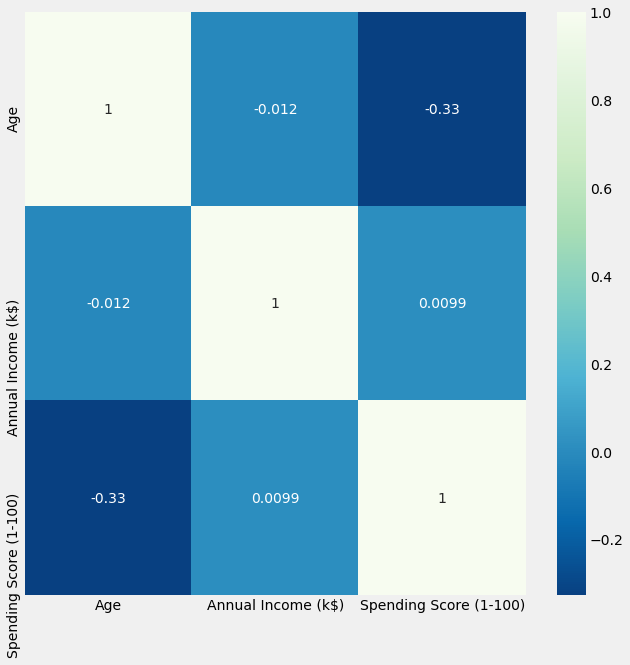

In [13]:
# Creating a correlation matrix to see how correlated the variables are with each other.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_without_id.corr(), annot = True, ax=ax, cmap = 'GnBu_r')

Text(0, 0.5, 'Spending Score')

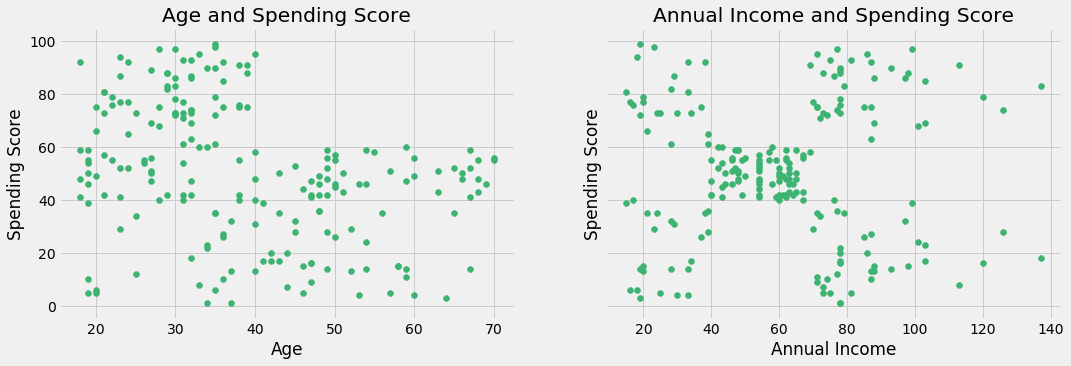

In [14]:
# Creating scatter plots showing spending scores with age and annual income
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(data['Age'],data['Spending Score (1-100)'], c = 'mediumseagreen')
ax1.set_title('Age and Spending Score')
ax1.set_xlabel('Age')
ax1.set_ylabel('Spending Score')
ax2.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c = 'mediumseagreen')
ax2.set_title('Annual Income and Spending Score')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

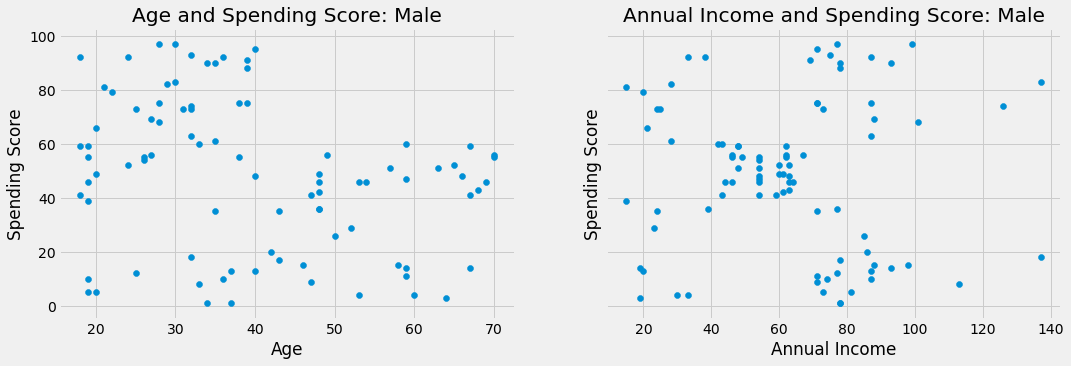

In [15]:
# Creating scatter plots showing spending scores with age and annual income
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(male['Age'],male['Spending Score (1-100)'])
ax1.set_title('Age and Spending Score: Male')
ax1.set_xlabel('Age')
ax1.set_ylabel('Spending Score')
ax2.scatter(male['Annual Income (k$)'],male['Spending Score (1-100)'])
ax2.set_title('Annual Income and Spending Score: Male')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

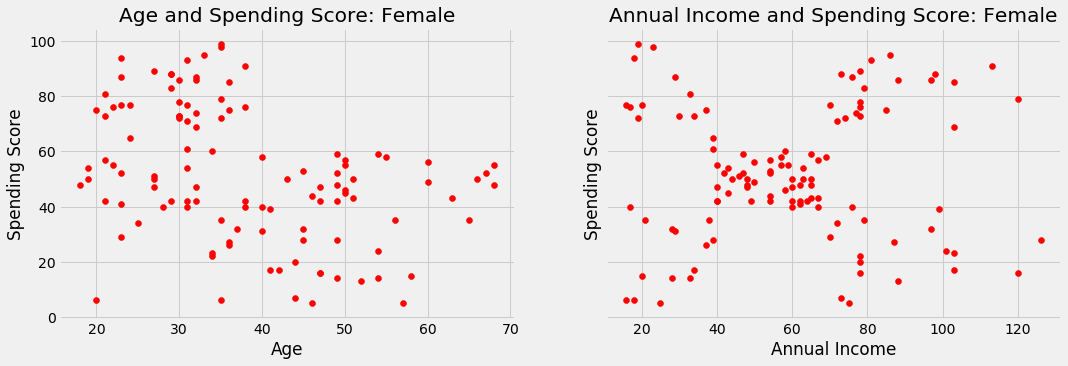

In [16]:
# Creating scatter plots showing spending scores with age and annual income
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(female['Age'],female['Spending Score (1-100)'], c = 'red')
ax1.set_title('Age and Spending Score: Female')
ax1.set_xlabel('Age')
ax1.set_ylabel('Spending Score')
ax2.scatter(female['Annual Income (k$)'],female['Spending Score (1-100)'], c = 'red')
ax2.set_title('Annual Income and Spending Score: Female')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')

Both the male and female very closely resemble the the overall customer graphs so similar insights for each gender could be drawn by clustering both female and male customers together.

## Clustering 

### Age and Spending Score

In [17]:
X1 = data.drop(columns = ['Annual Income (k$)', 'CustomerID', 'Gender'], axis = 1)
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### Scale the Data

In [18]:
from sklearn import preprocessing as pp

scaled_X1 = pp.scale(X1)

In [19]:
kmeans_x1 = KMeans(2)
kmeans_x1.fit(scaled_X1)

KMeans(n_clusters=2)

In [20]:
clusters_x1 = X1.copy()

clusters_x1['cluster_pred_2'] = kmeans_x1.predict(scaled_X1)

In [21]:
type(kmeans_x1.fit_predict(X1))

numpy.ndarray

Text(0, 0.5, 'Spending Score')

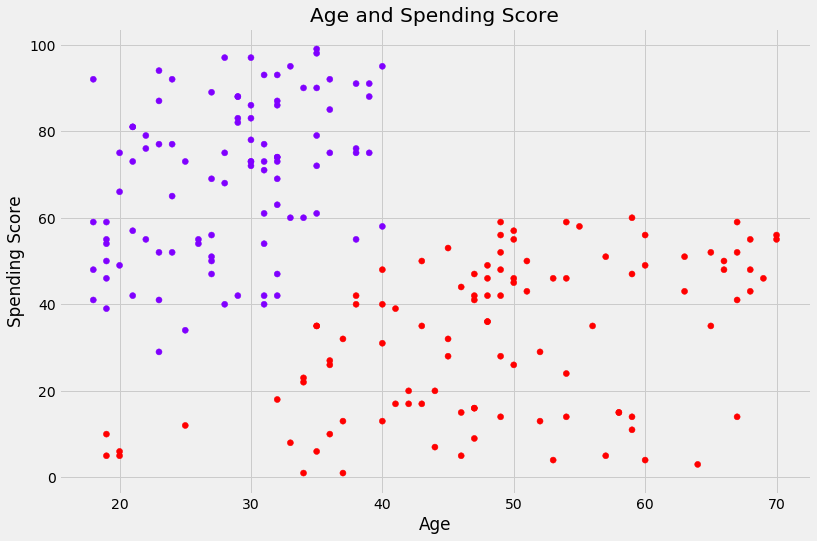

In [22]:
plt.figure(1, figsize = (12,8))
plt.scatter(clusters_x1['Age'], clusters_x1['Spending Score (1-100)'], 
           c = clusters_x1['cluster_pred_2'], cmap = 'rainbow')
plt.title('Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

### Elbow Method

In [23]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 11
for i in range (1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(scaled_X1)
    wcss.append(kmeans.inertia_)
wcss

[400.00000000000006,
 189.3874903399244,
 124.32628617921526,
 89.8472557298056,
 71.0936414145941,
 53.12843835629399,
 46.22634035662258,
 39.223488787809195,
 33.935199612787066,
 28.824632511261857]

Text(0, 0.5, 'WCSS')

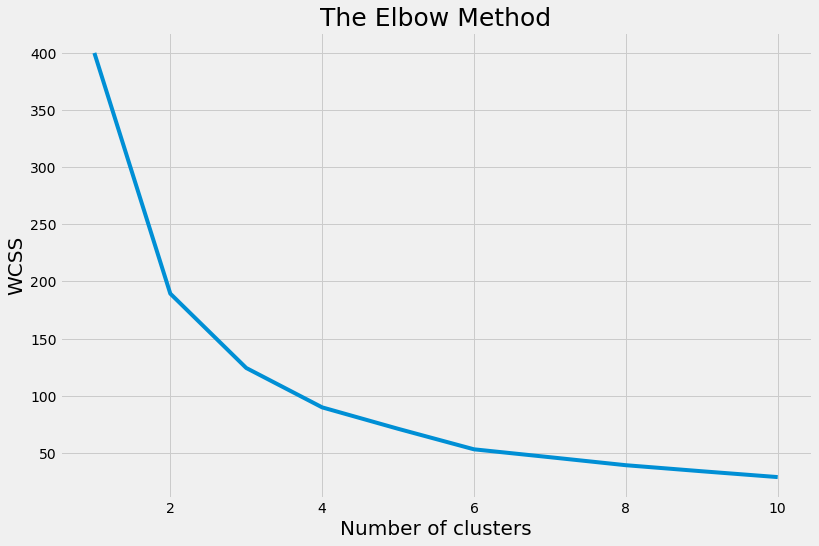

In [24]:
# Plotting the elbow graph
plt.figure(1, figsize = (12,8))
number_clusters = range(1,cl_num)
plt.plot(list(range(1,11)), wcss)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('WCSS', fontsize = 20)

There are elbow points at 2, 3, 4 clusters. We already tried KMeans with 2 clusters, let's try it when k = 3 and 4.

In [25]:
kmeans_x1_3 = KMeans(3)
kmeans_x1_3.fit(scaled_X1)

KMeans(n_clusters=3)

In [26]:
clusters_x1['cluster_pred_3'] = kmeans_x1_3.predict(scaled_X1)

Text(0, 0.5, 'Spending Score')

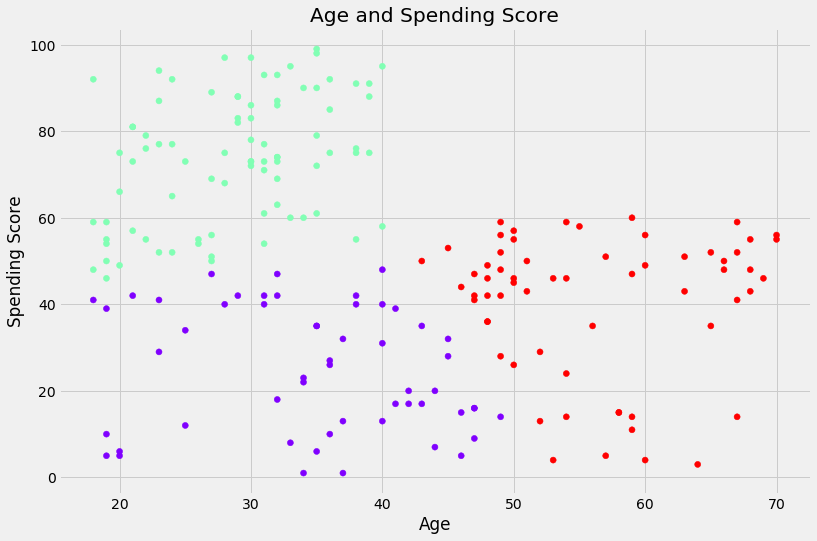

In [27]:
plt.figure(1, figsize = (12,8))
plt.scatter(clusters_x1['Age'], clusters_x1['Spending Score (1-100)'], 
           c = clusters_x1['cluster_pred_3'], cmap = 'rainbow')
plt.title('Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [28]:
kmeans_x1_4 = KMeans(4)
kmeans_x1_4.fit(scaled_X1)

KMeans(n_clusters=4)

In [29]:
clusters_x1['cluster_pred_4'] = kmeans_x1_4.predict(scaled_X1)

Text(0, 0.5, 'Spending Score')

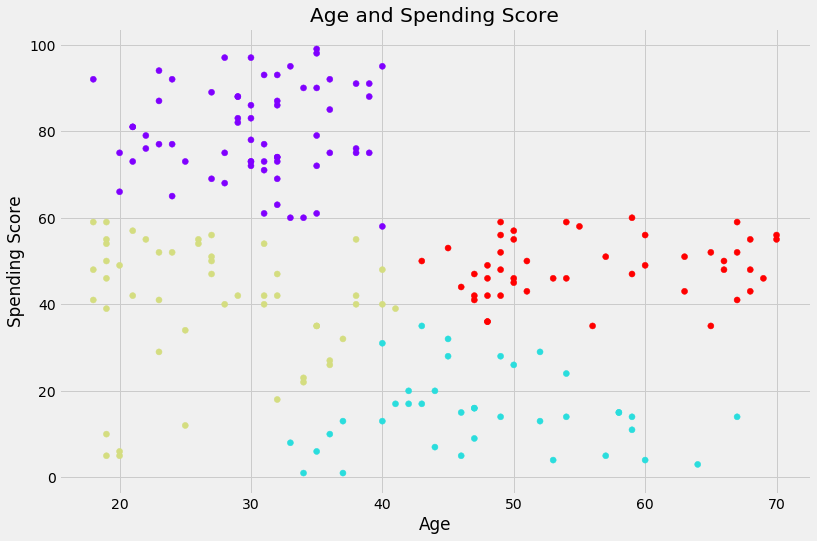

In [30]:
plt.figure(1, figsize = (12,8))
plt.scatter(clusters_x1['Age'], clusters_x1['Spending Score (1-100)'], 
           c = clusters_x1['cluster_pred_4'], cmap = 'rainbow')
plt.title('Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

More insight can be derived from KMeans with 4 clusters. This is the perfect number of clusters for studying age and spending score.

### Annual Income and Spending Score

In [31]:
X2 = data.drop(columns = ['Age', 'CustomerID', 'Gender'], axis = 1)

### Scale The Data

In [32]:
scaled_X2 = pp.scale(X2)

In [33]:
kmeans_x2 = KMeans(2)
kmeans_x2.fit(scaled_X2)

KMeans(n_clusters=2)

In [34]:
clusters_x2 = X2.copy()

clusters_x2['cluster_pred_2'] = kmeans_x2.predict(scaled_X2)

### Visualize Clusters

Text(0, 0.5, 'Spending Score')

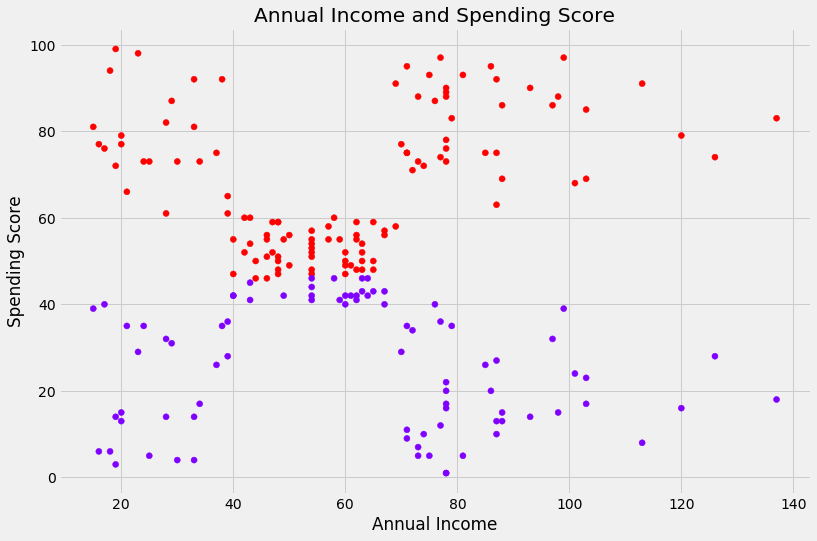

In [35]:
plt.figure(1, figsize = (12,8))
plt.scatter(clusters_x2['Annual Income (k$)'], clusters_x2['Spending Score (1-100)'], 
           c = clusters_x2['cluster_pred_2'], cmap = 'rainbow')
plt.title('Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

### Elbow Method (again)

In [36]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 11
for i in range (1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(scaled_X2)
    wcss.append(kmeans.inertia_)
wcss

[399.99999999999994,
 269.01679374906655,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.103778121150555,
 46.824819382648336,
 37.148116972291106,
 32.39226763033118,
 29.193145383499317]

Text(0, 0.5, 'WCSS')

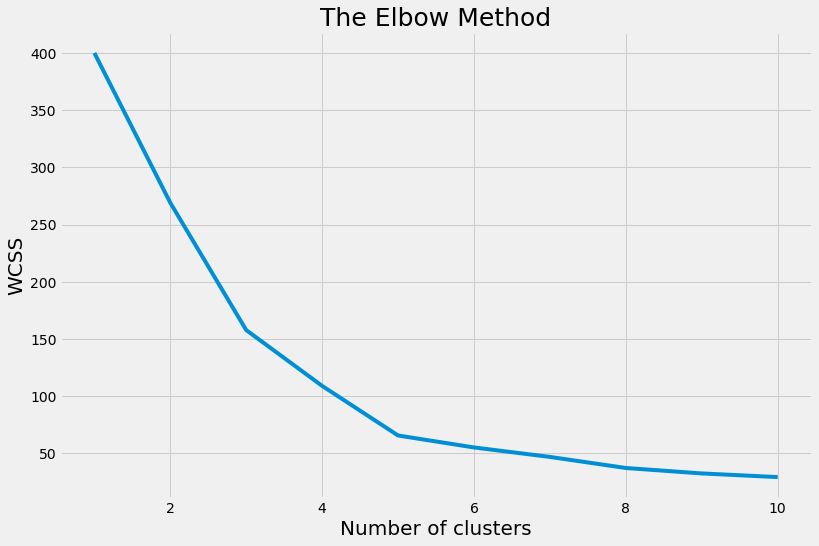

In [37]:
# Plotting the elbow graph
plt.figure(1, figsize = (12,8))
number_clusters = range(1,cl_num)
plt.plot(list(range(1,11)), wcss)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('WCSS', fontsize = 20)

The elbow points are at k = 3 and k = 5. Lets try both to see which one is better.

In [38]:
kmeans_x2_3 = KMeans(3)
kmeans_x2_3.fit(scaled_X2)

KMeans(n_clusters=3)

In [39]:
clusters_x2['cluster_pred_3'] = kmeans_x2_3.predict(scaled_X2)

### Visualize Clusters

Text(0, 0.5, 'Spending Score')

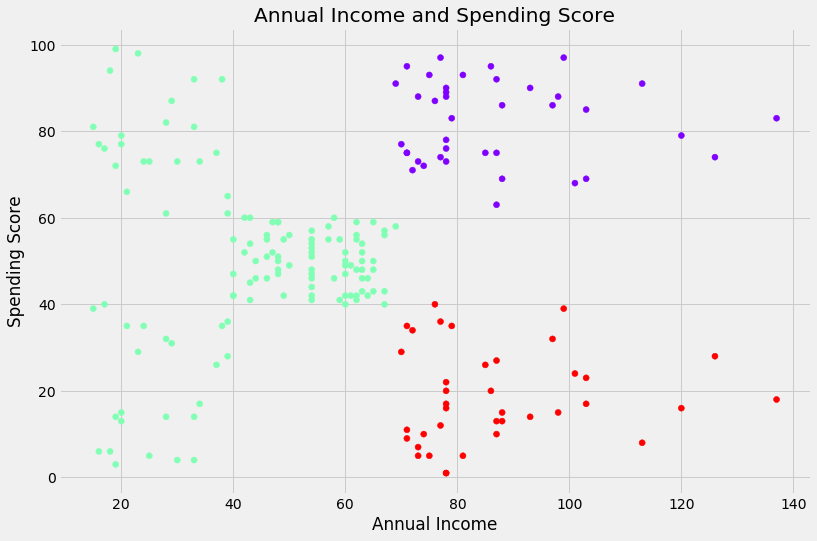

In [40]:
plt.figure(1, figsize = (12,8))
plt.scatter(clusters_x2['Annual Income (k$)'], clusters_x2['Spending Score (1-100)'], 
           c = clusters_x2['cluster_pred_3'], cmap = 'rainbow')
plt.title('Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [41]:
kmeans_x2_5 = KMeans(5)
kmeans_x2_5.fit(scaled_X2)

KMeans(n_clusters=5)

In [42]:
clusters_x2['cluster_pred_5'] = kmeans_x2_5.predict(scaled_X2)

### Visualize Clusters

Text(0, 0.5, 'Spending Score')

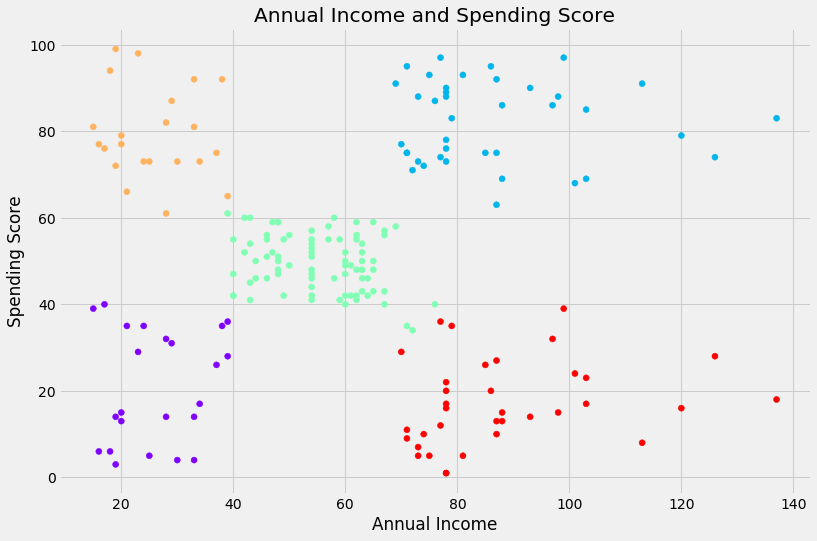

In [43]:
plt.figure(1, figsize = (12,8))
plt.scatter(clusters_x2['Annual Income (k$)'], clusters_x2['Spending Score (1-100)'], 
           c = clusters_x2['cluster_pred_5'], cmap = 'rainbow')
plt.title('Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

## Heatmap

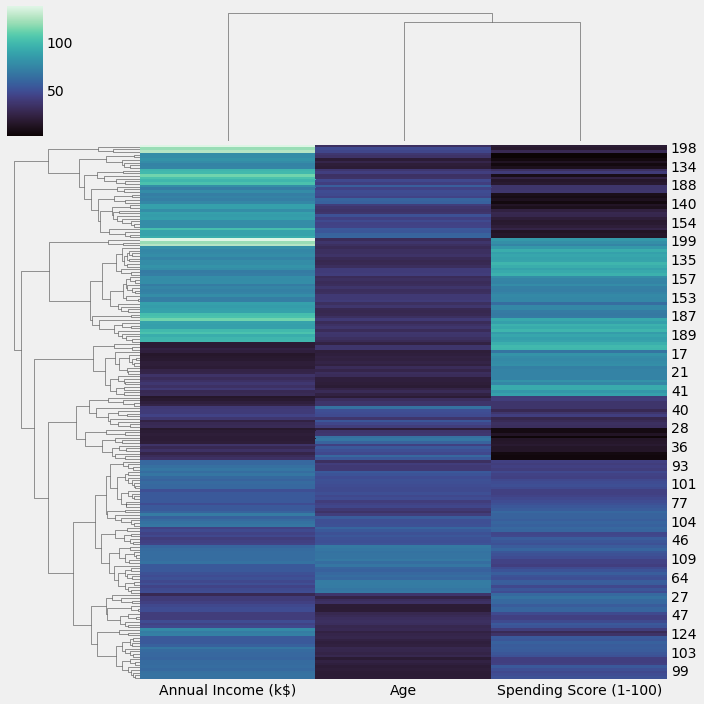

In [44]:
X_no_gender = data.drop(columns = ['Gender', 'CustomerID'], axis = 1)
sns.clustermap(X_no_gender, cmap = 'mako')

The heatmap shows how similar the customers (right of heatmap) in terms of the variables in the dataset. The similar colors mean simmilar attributes. For example customers 135 and 157 have similar spending scores, age, and annual income because the colors for each variable are similar.

The diagram on the left of the heatmap is a dendrogram. Before the analysis of the customer data has been through a type of clustering called flat clustering, for which we used KMeans. Dendrograms are a representation of agglomerative hierarchial clustering. In terms of this project, agglomerative clustering means that each customer starts as their own cluster and using similarity measure two customers will be grouped together to become one cluster and that cluster will group together with another cluster and so on.

## Conclusions

Text(0, 0.5, 'Spending Score')

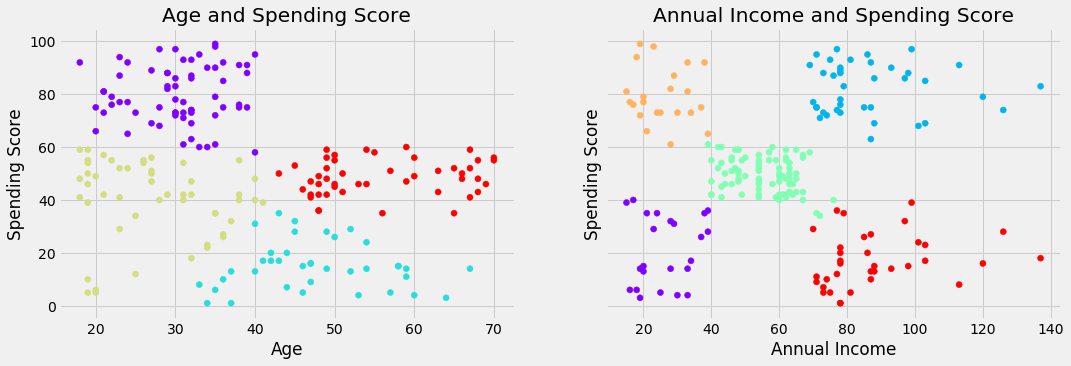

In [45]:
# Creating sub  scatter plots showing clusters in both grpahs spending scores 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(clusters_x1['Age'],clusters_x1['Spending Score (1-100)'], 
           c = clusters_x1['cluster_pred_4'], 
           cmap = 'rainbow')
ax1.set_title('Age and Spending Score')
ax1.set_xlabel('Age')
ax1.set_ylabel('Spending Score')
ax2.scatter(clusters_x2['Annual Income (k$)'],clusters_x2['Spending Score (1-100)'], 
           c = clusters_x2['cluster_pred_5'], 
           cmap = 'rainbow')
ax2.set_title('Annual Income and Spending Score')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')

Note: Same colored clusters in both graphs may not necessarily look at the same customers.

#### Age and Spending Score:
Purple Cluster: Young customers who really like the mall (target customers).

Yellow Green Cluster: Young customers who shop at the mall a fair amount but not as much as the purple customers.

Red Cluster: Older customers who like the yellow green cluster shop a decent amount but not as much as the purple customers.

Light Blue Cluster: Mostly older customers (>30) who don't really like the mall and don't shop a lot. 

#### Annual Income and Spending Score:
Peach Cluster: Customers who really like the mall and shop a lot, but don't have a high income (target customers).

Purple Cluster: Customers who don't shop a lot at the mall and don't have a high income.

Light Green Cluster: Customers who make a medium income and dont shop as much as the red customers but shop more than the purple customers. 

Blue Cluster: Customers with a high income and really like the mall and shop a lot there (target customers).

Red Cluster: Customers with a high income who don't like the mall and don't shope there. 

### Age, Annual Income, Spending Score

In [46]:
X = data.drop(['CustomerID', 'Gender'], axis = 1)

scaled_X = pp.scale(X)

In [47]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 11
for i in range (1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
wcss

[599.9999999999999,
 389.38618895643714,
 295.21224615554877,
 205.22514747675913,
 168.2475801755683,
 133.88887021131023,
 117.05612671073291,
 104.09784107506621,
 93.30491460935875,
 82.73245142099461]

Text(0, 0.5, 'WCSS')

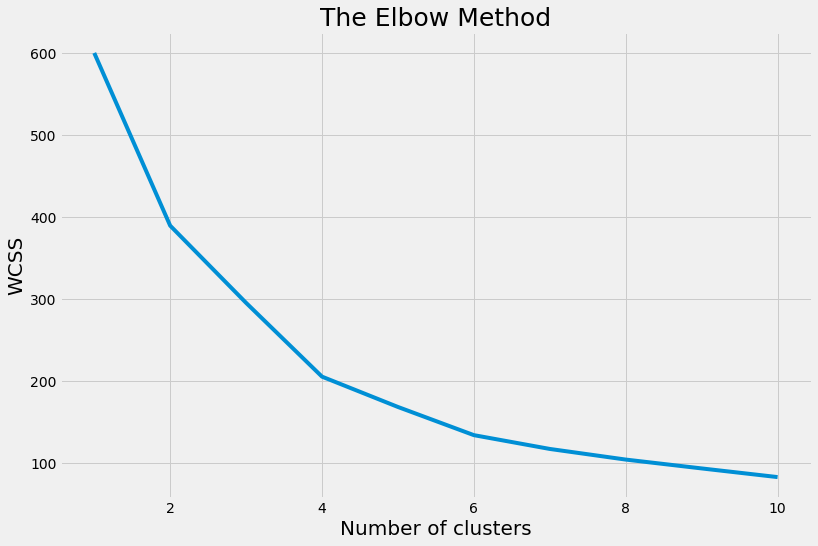

In [48]:
# Plotting the elbow graph
plt.figure(1, figsize = (12,8))
number_clusters = range(1,cl_num)
plt.plot(list(range(1,11)), wcss)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('WCSS', fontsize = 20)

The optimal number of clusters seems to be 6.

In [49]:
kmeans_all = KMeans(6).fit(scaled_X)

X['cluster_pred'] = kmeans_all.predict(scaled_X)

In [50]:
X

,Age,Annual Income (k$),Spending Score (1-100),cluster_pred
0,19,15,39,5
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


In [55]:
import plotly.express as px

fig = px.scatter_3d(X, x = 'Age', y = 'Annual Income (k$)', z = 'Spending Score (1-100)',
                   color = 'cluster_pred')
fig.show()

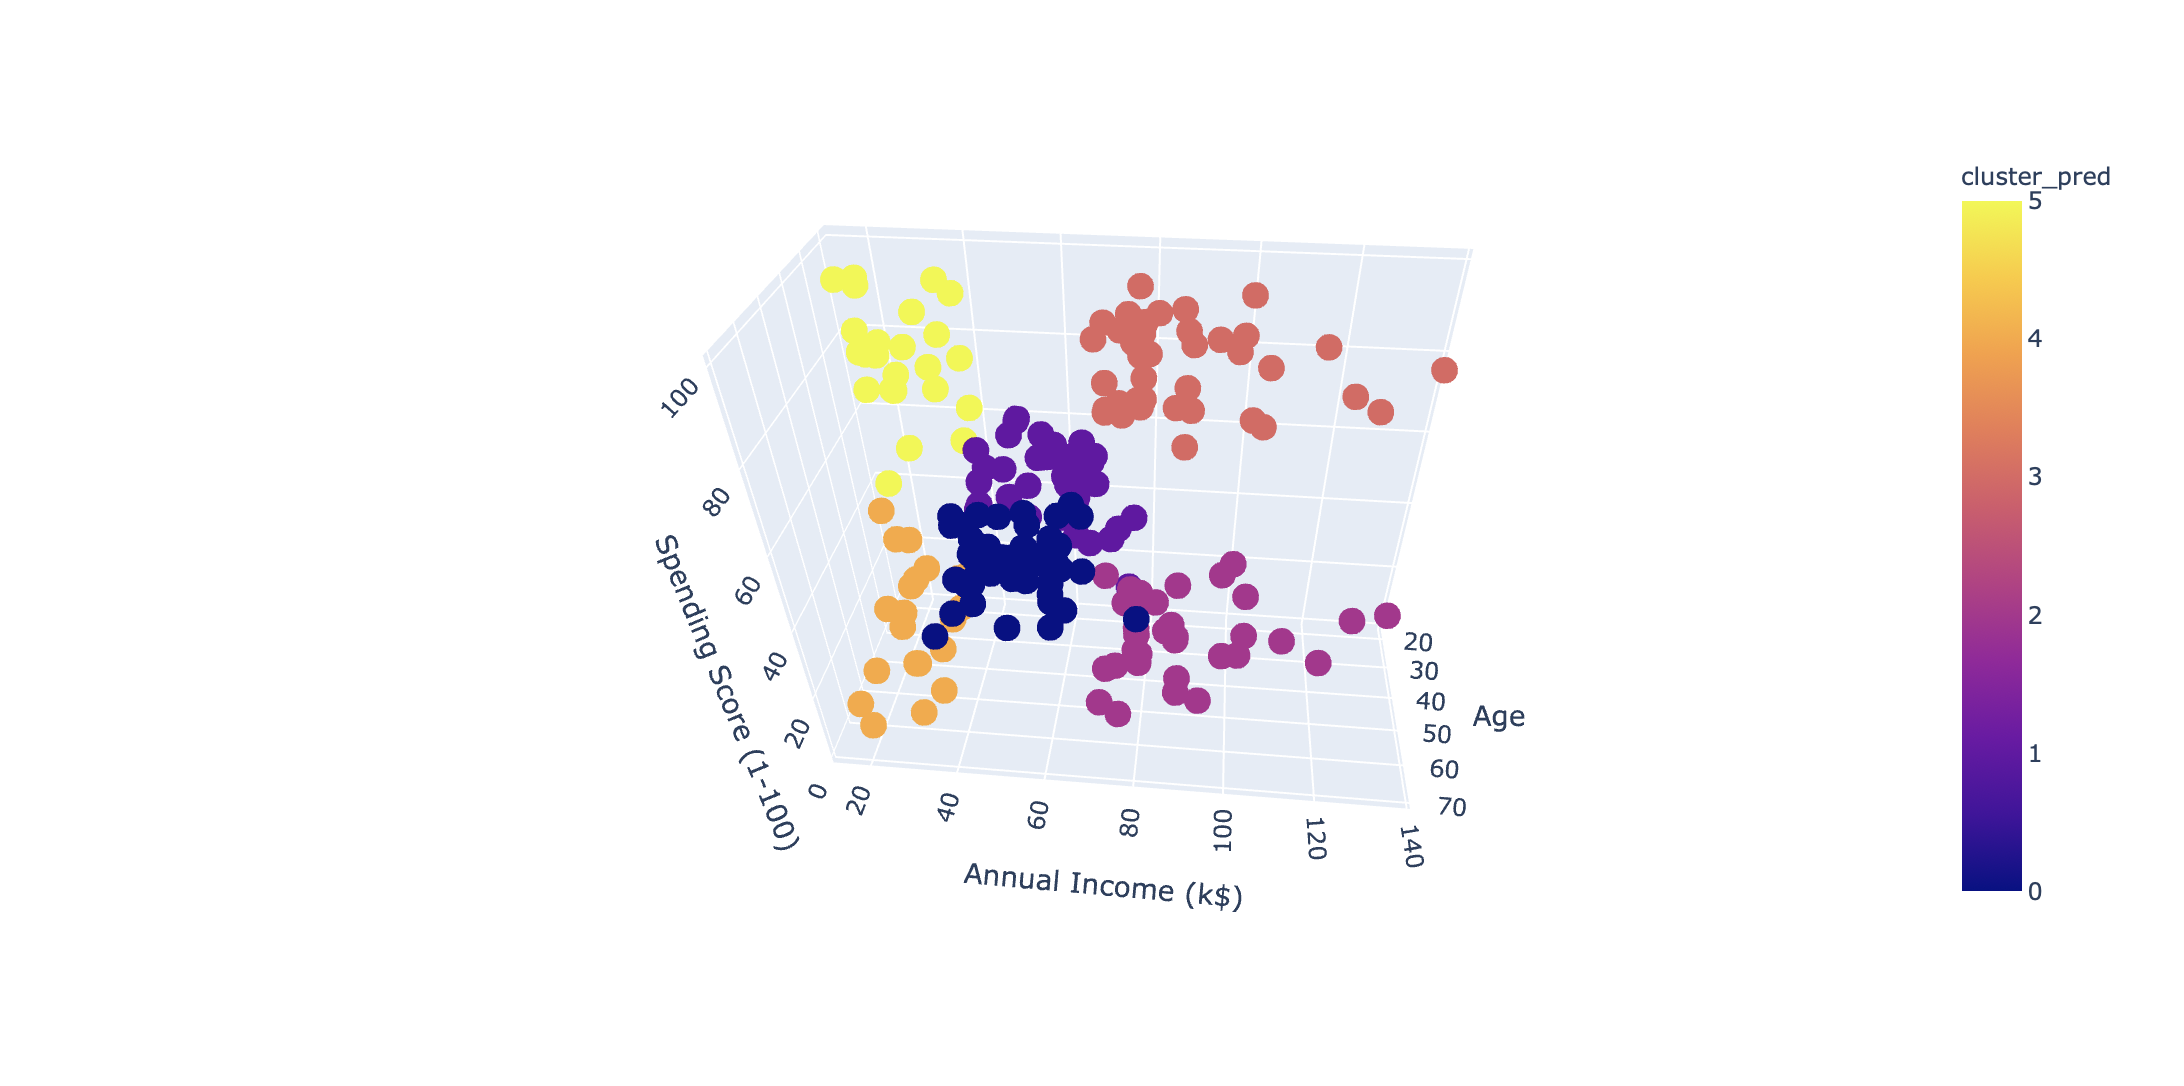

In [59]:
from IPython.display import Image
Image(filename = 'Plotly Graph - Mall Customers.png', width = 1000, height = 1000)

Yellow Cluster: Younger customers with lower income who like the mall and shop there a lot (target customers).

Orange Cluster: Like the orange customers, low income but slightly older and don't shop a lot at the mall.

Dark Purple Cluster: Younger customers who don't shop at the mall as much as the yellow and red customers.

Dark Blue Cluster: Older customers who don't shop at the mall as much as the yellow and red customers.

Red Cluster: Younger customers with a high income who like the mall and shop a lot (target customers). 

Light Purple Cluster: Older customers who have a high income, but don't shop a lot at the mall.

From the information that I gathered our target customers are younger people, from late teens to people in their younger 30s. We know this, because younger customers tend to shop at the mall more regardless of their income. The customers who fit this age group in the dark purple cluster probably don't like the mall as much as their young counterparts. Incentives and discounts should be devised to lure these younger people into shopping more at this mall.  